In [ ]:
#Neural Network from scratch

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
test = pd.read_csv('data/test.csv')
print(test)
test = np.array(test)
train =  pd.read_csv('data/train.csv')
print(train)
train = np.array(train)

X_test = test.T/255
X_train = train[:,1:].T/255
y_train = train[:,0].T


       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [122]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5 #10 is the number of neurons in the layer
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2

def ReLu(Z):
    return np.maximum(0,Z)

def derivative_ReLu(Z):
    return Z > 0

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def derivative_sigmoid(Z):
    return sigmoid(Z) * (1 - sigmoid(Z))


def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Subtract max for numerical stability
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_propagation(W1,b1,W2,b2,X, activation_function='ReLu'):
    Z1 = W1.dot(X) + b1
    if activation_function == 'ReLu':
        A1 = ReLu(Z1)
    else:
        A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def back_propagation(Z1, A1,Z2,A2,W2,X,Y, activation_function='ReLu'):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2,axis =1,keepdims=True)  
    if activation_function == 'ReLu':
        dZ1 = W2.T.dot(dZ2) * derivative_ReLu(Z1)
    else:
        dZ1 = W2.T.dot(dZ2) * derivative_sigmoid(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1,axis =1,keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2

def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    return np.sum(predictions == Y) / Y.size

def calculate_loss(A2,Y):
    return np.sum(-np.log(A2[Y, np.arange(Y.size)])) / Y.size

def gradient_descent(X,Y,iterations,alpha,activation_function='ReLu'):
    W1,b1,W2,b2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_propagation(W1,b1,W2,b2,X,activation_function)
        dW1,db1,dW2,db2 = back_propagation(Z1,A1,Z2,A2,W2,X,Y,activation_function)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i % 50 == 0:
            print("--------------")
            print("Iteration: ",i)
            print(f"Accuracy: {get_accuracy(get_predictions(A2),Y):.4f}")
            print(f"Loss: {calculate_loss(A2,Y):.4f}")
    return W1,b1,W2,b2


In [123]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 1000, 0.1,'sigmoid')

--------------
Iteration:  0
Accuracy: 0.0924
Loss: 2.4914
--------------
Iteration:  50
Accuracy: 0.2058
Loss: 2.2135
--------------
Iteration:  100
Accuracy: 0.3528
Loss: 2.0762
--------------
Iteration:  150
Accuracy: 0.4522
Loss: 1.9322
--------------
Iteration:  200
Accuracy: 0.5209
Loss: 1.7934
--------------
Iteration:  250
Accuracy: 0.5748
Loss: 1.6654
--------------
Iteration:  300
Accuracy: 0.6138
Loss: 1.5487
--------------
Iteration:  350
Accuracy: 0.6467
Loss: 1.4416
--------------
Iteration:  400
Accuracy: 0.6724
Loss: 1.3419
--------------
Iteration:  450
Accuracy: 0.6897
Loss: 1.2541
--------------
Iteration:  500
Accuracy: 0.7033
Loss: 1.1796
--------------
Iteration:  550
Accuracy: 0.7150
Loss: 1.1150
--------------
Iteration:  600
Accuracy: 0.7259
Loss: 1.0584
--------------
Iteration:  650
Accuracy: 0.7364
Loss: 1.0083
--------------
Iteration:  700
Accuracy: 0.7471
Loss: 0.9637
--------------
Iteration:  750
Accuracy: 0.7557
Loss: 0.9237
--------------
Iteration:  

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index,W1,b1,W2,b2):
    image = X_test[:,index,None]
    prediction = make_predictions(image, W1, b1, W2, b2)
    print("Predicted digit: ",prediction)
    image = image.reshape(28,28)
    plt.imshow(image, cmap='gray')
    plt.show()

predictions = make_predictions(X_test, W1, b1, W2, b2)
df = pd.DataFrame(predictions, columns = ['Label'])

,Label
0,2
1,0
2,9
3,9
4,3
...,...
27995,9
27996,7
27997,3
27998,9


Predicted digit:  [0]


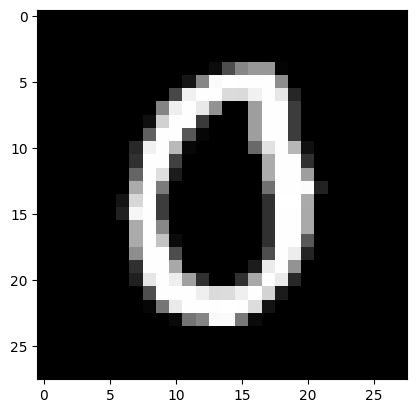

In [115]:
test_prediction(100,W1,b1,W2,b2)